In [193]:
import pandas as pd
import pandas_datareader.data as web
from pandas import Series, DataFrame
import datetime
from datetime import date, timedelta, datetime
import math
import matplotlib as mpl
import numpy as np
import talib as ta
from os import walk
from finta import TA
import yfinance as yf

In [194]:
StartingAmount = 500_000/505

import libaries

In [195]:
stock = "IPGP"
startDate = datetime.strptime('2021-09-05',"%Y-%m-%d")
offsetDate = timedelta(39)
startDate = startDate - offsetDate
endDate = datetime.strptime('2021-11-05',"%Y-%m-%d")
df = pd.read_csv("C:/Users/rohan/Desktop/SchoolWork/StockMarketSimulationIQP/RohanCode/Data/clean_30y_stock_csvs/{}.csv".format(stock))
df = df.rename(columns={"CLOSE": "Close", "VOLUME": "Volume", "OPEN":"Open","HIGH":"High","LOW":"Low"})

df['Datetime'] = pd.to_datetime(df['Datetime'])

df = df[~(df['Datetime'] < startDate)]
df = df[~(df['Datetime'] > endDate)]
len(df)

71

In [196]:
df['Price_Moving_Avg'] = df['Close'].rolling(window=30).mean()
df['Vol_Moving_Avg'] = df['Volume'].rolling(window=30).mean()
df['ADX'] = ta.ADX(df['High'],df['Low'],df['Close'], timeperiod=14)
df['RSI'] = ta.RSI(df['Close'], timeperiod=14)
aroondown, aroonup = ta.AROON(df['High'], df['Low'], timeperiod=14)
df['AroonDown'] = aroondown
df['AroonUp'] = aroonup
df['Fisher'] =TA.IFT_RSI(df)


In [197]:
daysHistory = len(df['Close'])
df = df[df['Price_Moving_Avg'].notna()]
df = df.dropna()

len(df)

42

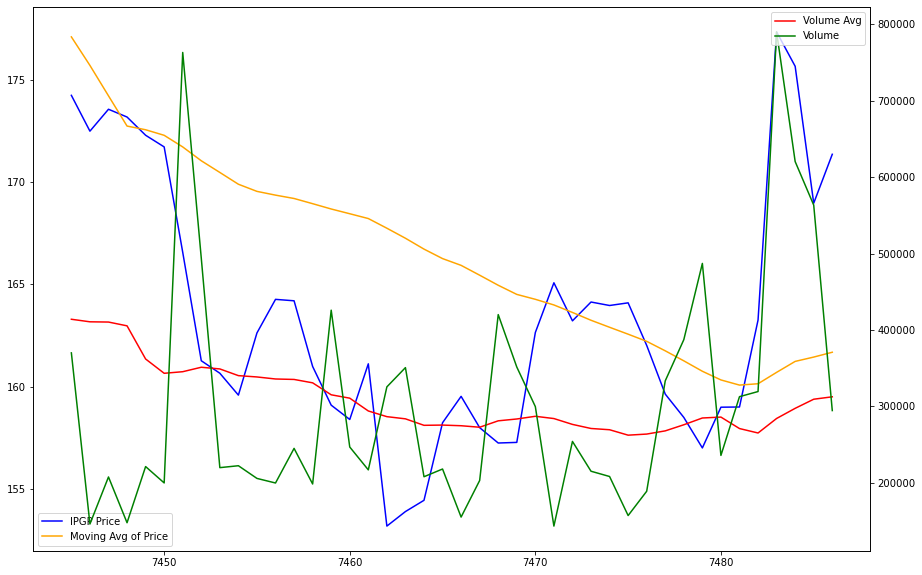

In [198]:
close_price = df["Close"]
mavgplot = df["Price_Moving_Avg"]
vmagplot = df["Vol_Moving_Avg"]
volumePlot = df['Volume']
rsiPlot = df['RSI']
adxPlot = df['ADX']
up = df['AroonUp']
down = df['AroonDown']

mpl.rc('figure',figsize=(15,10))
#mpl.style.use('ggplot')

close_price.plot(label=(stock+" Price"),legend=True,color='blue')
mavgplot.plot(label = 'Moving Avg of Price',legend=True,color='orange')
vmagplot.plot(secondary_y=True,label='Volume Avg',legend = True,color='red')
volumePlot.plot(label ='Volume',secondary_y=True,legend =False,color = 'green')
mpl.pyplot.legend(loc="upper right")
mpl.pyplot.show()
#AddPriceMoving Avg

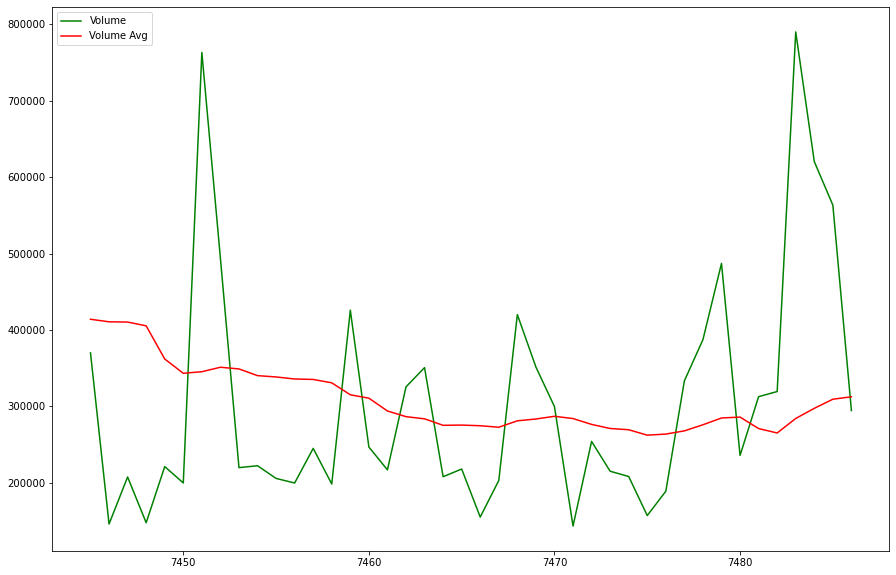

In [199]:

volumePlot.plot(label ='Volume',secondary_y=False,legend =False,color = 'green')
vmagplot.plot(secondary_y=False,label='Volume Avg',legend = True,color='red')
mpl.pyplot.legend()
mpl.pyplot.show()

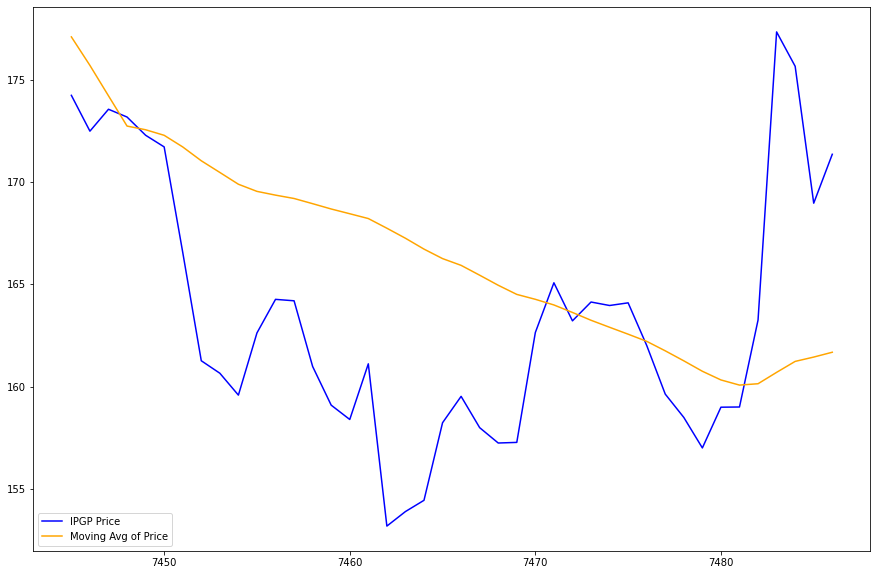

In [200]:
close_price.plot(label=(stock+" Price"),legend=True,color='blue')
mavgplot.plot(label = 'Moving Avg of Price',legend=True,color='orange')
#mpl.pyplot.legend()
mpl.pyplot.show()

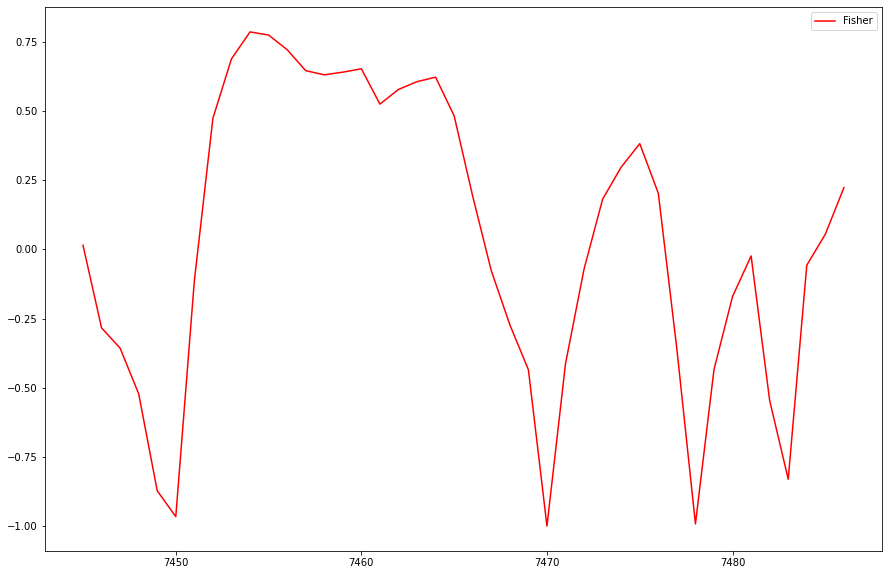

In [201]:
# up.plot(label=("UP"),legend=True,color='blue')
# down.plot(label = 'Down',legend=True,color='red')
f = df['Fisher']
f.plot(label = 'Fisher',legend=True,color='red')

#mpl.pyplot.legend()
mpl.pyplot.show()



In [202]:
df['Price Lower than MAVG'] = df['Price_Moving_Avg'].gt(df['Close'])
# adj close . lt - Price moving

df['Volume Higher than MAVG'] = df['Vol_Moving_Avg'].gt(df['Volume'])

df

,Datetime,Open,High,Low,Close,Volume,Price_Moving_Avg,Vol_Moving_Avg,ADX,RSI,AroonDown,AroonUp,Fisher,Price Lower than MAVG,Volume Higher than MAVG
7445,2021-09-08 20:00:00,174.339996,176.559998,173.820007,174.240005,370000,177.097000,414010.000000,44.097976,34.262918,0.000000,85.714286,0.015117,True,True
7446,2021-09-09 20:00:00,175.429993,176.160004,172.300003,172.490005,146000,175.702666,410673.333333,43.027980,32.577974,0.000000,78.571429,-0.283270,True,True
7447,2021-09-12 20:00:00,174.399994,175.440002,172.500000,173.559998,207600,174.215999,410353.333333,42.034412,34.692681,0.000000,71.428571,-0.356628,True,True
7448,2021-09-13 20:00:00,174.270004,174.820007,172.820007,173.179993,147700,172.738666,405393.333333,41.111814,34.281436,0.000000,64.285714,-0.521057,False,True
7449,2021-09-14 20:00:00,173.199997,174.600006,171.330002,172.289993,221200,172.558665,362003.333333,40.508991,33.286231,35.714286,57.142857,-0.871462,True,True
7450,2021-09-15 20:00:00,171.600006,172.539993,169.639999,171.720001,199800,172.286999,343286.666667,40.226780,32.632841,28.571429,50.000000,-0.964723,True,True
7451,2021-09-16 20:00:00,170.970001,171.720001,165.330002,166.570007,763200,171.718666,345363.333333,40.584744,27.399562,100.000000,42.857143,-0.113642,True,False
7452,2021-09-19 20:00:00,163.690002,164.990005,158.619995,161.270004,493900,171.042666,351203.333333,41.647005,23.264622,100.000000,35.714286,0.473507,True,False
7453,2021-09-20 20:00:00,163.240005,163.399994,160.529999,160.660004,219800,170.472000,348990.000000,42.633390,22.837442,92.857143,28.571429,0.687793,True,True
7454,2021-09-21 20:00:00,162.210007,162.740005,159.009995,159.589996,222300,169.896000,340223.333333,43.698001,22.071852,85.714286,21.428571,0.785223,True,True


In [203]:

PL=0.00
Total_Gain =0
starting_price =1
#PG -> Per_Gain

Start_Price = (df['Close'].head(1))
Start_Price = float(Start_Price)
print("Start Price:", Start_Price)

End_Price = (df['Close'].tail(1))
End_Price = float(End_Price)
print("End Price:", End_Price)

Return = (PL/Start_Price)
Return_Per = "{:.2%}".format(Return)



benchRe = End_Price - Start_Price
benchREP = (benchRe/Start_Price) 
TotalPro = (benchREP) * StartingAmount
print(TotalPro)

Start Price: 174.24000549316406
End Price: 171.36000061035156
-16.365300121013515


In [204]:
TotalReturn = StartingAmount
index =0
bought = False
# for date_var,row in df.iterrows():
#     maxValue = df.iloc[index-30:index]['Close'].max()
#     if(math.isnan(maxValue)):
#         maxValue = 0
#     if row['Volume Higher than MAVG']==1:
#         if row['Price Lower than MAVG']==1:
#             if z==1:
#                 print(date_var,row['Close'], '- BUY')
#                 close_adj = row['Close']
#                 starting_price = close_adj
#                 z -=1
                
#     elif(df.iloc[index-1]['Close']>=(maxValue) and maxValue !=0):
#         if z==1:
#                 print(date_var,row['Close'], '- BUYING BC OF TREND INCREASE')
#                 close_adj = row['Close']
#                 starting_price = close_adj
#                 z -=1
#     else:
#         if row['Volume Higher than MAVG']==0 and row['Price Lower than MAVG']==0 :
#                 if z==0:
#                     print(date_var,row['Close'],'- SELL')
#                     close_adj = row['Close']
#                     single_trade_percent_gain = ((close_adj - starting_price) / starting_price) * 100
#                     Total_Gain += single_trade_percent_gain

#                     print("This trade gain/loss results: "+str(round(single_trade_percent_gain,2))+"%")
#                     print()
#                     z+=1
#         else:
#             if (((df.iloc[index-1]['Close']- starting_price)/starting_price) * 100) > .5:
#                 if z==0:
#                     print(date_var,row['Close'],'- SELL DUE TO PRICE INCREASE')
#                     close_adj = row['Close']
#                     single_trade_percent_gain = ((close_adj - starting_price) / starting_price) * 100
#                     Total_Gain += single_trade_percent_gain
#                     print("This trade gain/loss results: "+str(round(single_trade_percent_gain,2))+"%")
#                     print()
#                     z+=1
#     index +=1

# for date_var,row in df.iterrows():
#     maxValue = df.iloc[index-30:index]['Close'].max()
#     if(math.isnan(maxValue)):
#         maxValue = 0

#     if(z==1):
#         if row['Volume Higher than MAVG']==1:
#             if row['Price Lower than MAVG']==1:
#                 if z==1:
#                     print(row['Datetime'],row['Close'], '- BUY')
#                     close_adj = row['Close']
#                     starting_price = close_adj
#                     z -=1
#     elif(row['ADX']>18):
#         if(z==1):
#             if(row['RSI']<=30):
#                     print(row['Datetime'],row['Close'], '- Buy due to Over-Buy')
#                     close_adj = row['Close']
#                     starting_price = close_adj
#                     z -=1
#             elif(row['Close']>=(maxValue) and maxValue !=0):
#                     print(row['Datetime'],row['Close'], '- BUYING BC OF TREND INCREASE')
#                     close_adj = row['Close']
#                     starting_price = close_adj
#                     z -=1
#         else:
#             if(z==0):
#                 if (((row['Close']- starting_price)/starting_price) * 100) > .5:
#                         if z==0:
#                             print(row['Datetime'],row['Close'],'- SELL DUE TO PRICE INCREASE')
#                             close_adj = row['Close']
#                             single_trade_percent_gain = ((close_adj - starting_price) / starting_price) 
#                             Total_Gain += single_trade_percent_gain
#                             print("This trade gain/loss results: "+str(round(single_trade_percent_gain,2))+"%")
#                             print()
#                             z+=1
#                 elif row['Volume Higher than MAVG']==0 and row['Price Lower than MAVG']==0 :
#                         if z==0:
#                             print(row['Datetime'],row['Close'],'- SELL')
#                             close_adj = row['Close']
#                             single_trade_percent_gain = ((close_adj - starting_price) / starting_price) 
#                             Total_Gain += single_trade_percent_gain

#                             print("This trade gain/loss results: "+str(round(single_trade_percent_gain,2))+"%")
#                             print()
#                             z+=1
#                 else:
#                     if (row['RSI']>=60):
#                         if z==0:
#                             print(row['Datetime'],row['Close'],'- Oversell because of RSI')
#                             close_adj = row['Close']
#                             single_trade_percent_gain = ((close_adj - starting_price) / starting_price) 
#                             Total_Gain += single_trade_percent_gain
#                             print("This trade gain/loss results: "+str(round(single_trade_percent_gain,2))+"%")
#                             print()
#                             z+=1
#     index +=1
#     TotalReturn = (1+Total_Gain)*TotalReturn
#     Total_Gain = 0


#ADX
    #Tells how strong the trend is
        #Anything above 30 is a strong trend

#RSI
    #Tells if there is an over buy or over sell
        #From 0-30
            #Over sell
        #From 30-70
            #Normal
        #70-100
            #Over buy



for date_var,row in df.iterrows():
    maxValue = df.iloc[index-5:index]['Close'].max()
    if math.isnan(maxValue):
        maxValue = 0

    print("This is the price: ${} with maxVal of: ${} on the date of: {} ".format(row['Close'],maxValue,row['Datetime']))

    #Buy
    if(df.iloc[index-1]['Close'] > maxValue and not bought and maxValue!=0):
        print(row['Datetime'],row['Close'],'- Buy')
        close_adj = row['Close']
        starting_price = close_adj
        bought = True

    #Sell
    if(df.iloc[index-1]['Close'] < maxValue and bought and maxValue != 0):
        print(row['Datetime'],row['Close'],'- Sell')
        close_adj = row['Close']
        single_trade_percent_gain = ((close_adj - starting_price) / starting_price) 
        Total_Gain += single_trade_percent_gain
        print("This trade gain/loss results: "+str(round(single_trade_percent_gain,2))+"%")
        print()
        bought = False

    index +=1
    TotalReturn = (1 + Total_Gain) * TotalReturn
    Total_Gain = 0


if bought:
    print(row['Datetime'],row['Close'],'- SELL DUE TO LAST DAY')
    close_adj = row['Close']
    single_trade_percent_gain = ((close_adj - starting_price) / starting_price) 
    Total_Gain += single_trade_percent_gain
    print("This trade gain/loss results: {}%".format(round(single_trade_percent_gain*100,2)))
    TotalReturn = (1+Total_Gain)*TotalReturn
    Total_Gain = 0

Hold_Return = (End_Price - Start_Price)
Hold_Return_Per = "{:.2%}".format((End_Price-Start_Price)/Start_Price)
#TotalReturn = (Total_Gain+StartingAmount)
Total_Gain = ((TotalReturn - StartingAmount)/StartingAmount) 




print("The return for holding start to end was: "+str(Hold_Return_Per)+".")

print("Return percentage from all trades: " + str(round(Total_Gain*100,2))+"% based on "+str(daysHistory)+" days of data")
print("With a starting amount of: $"+str(round(StartingAmount,3))+" it ended with a profit of: $"+str(round(TotalReturn,3)))
print("This algoritm has gained you: $"+str(round(TotalReturn-StartingAmount,3)))






This is the price: $174.24000549316406 with maxVal of: $0 on the date of: 2021-09-08 20:00:00 
This is the price: $172.49000549316406 with maxVal of: $0 on the date of: 2021-09-09 20:00:00 
This is the price: $173.55999755859375 with maxVal of: $0 on the date of: 2021-09-12 20:00:00 
This is the price: $173.17999267578125 with maxVal of: $0 on the date of: 2021-09-13 20:00:00 
This is the price: $172.2899932861328 with maxVal of: $0 on the date of: 2021-09-14 20:00:00 
This is the price: $171.72000122070312 with maxVal of: $174.24000549316406 on the date of: 2021-09-15 20:00:00 
This is the price: $166.57000732421875 with maxVal of: $173.55999755859375 on the date of: 2021-09-16 20:00:00 
This is the price: $161.27000427246094 with maxVal of: $173.55999755859375 on the date of: 2021-09-19 20:00:00 
This is the price: $160.66000366210938 with maxVal of: $173.17999267578125 on the date of: 2021-09-20 20:00:00 
This is the price: $159.58999633789062 with maxVal of: $172.2899932861328 on t